<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/Gini_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de Classificador com Árvore de Decisão


Suponha que uma empresa quer decidir se deve ou não conceder crédito a novos clientes com base em três características qualitativas: "Renda" (Alta, Média, Baixa), "Histórico de Crédito" (Bom, Ruim) e "Emprego" (Estável, Instável). Temos o seguinte conjunto de dados fictício:

| Cliente | Renda | Histórico de Crédito | Emprego  | Aprovado |
|---------|-------|----------------------|----------|----------|
| 1       | Baixa | Ruim                 | Instável | Não      |
| 2       | Média | Bom                  | Estável  | Sim      |
| 3       | Alta  | Bom                  | Estável  | Sim      |
| 4       | Alta  | Ruim                 | Instável | Não      |
| 5       | Média | Ruim                 | Instável | Não      |
| 6       | Alta  | Bom                  | Estável  | Sim      |
| 7       | Média | Bom                  | Estável  | Sim      |
| 8       | Baixa | Bom                  | Instável | Não      |
| 9       | Baixa | Ruim                 | Estável  | Não      |
| 10      | Média | Bom                  | Instável | Sim      |

## Passo a Passo para Construir a Árvore de Decisão

### Passo 1: Calcular o Índice de Gini Inicial

O índice de Gini inicial para a coluna "Aprovado" é calculado como:

\[ $Gini = 1 - \left(\frac{n_{Sim}}{N}\right)^2 - \left(\frac{n_{Não}}{N}\right)^2$ \]

Onde \( n_{Sim} \) é o número de aprovações e \( n_{Não} \) é o número de não aprovações. Para nosso conjunto de dados:

\[ $Gini = 1 - \left(\frac{5}{10}\right)^2 - \left(\frac{5}{10}\right)^2 = 1 - 0.25 - 0.25 = 0.5$ \]

### Passo 2: Escolher a Primeira Divisão

Vamos testar todas as divisões possíveis e calcular o índice de Gini para cada subgrupo resultante.

#### Dividindo pela Renda

- **Renda Alta:** {Cliente 3, Cliente 4, Cliente 6}
- **Renda Média:** {Cliente 2, Cliente 5, Cliente 7, Cliente 10}
- **Renda Baixa:** {Cliente 1, Cliente 8, Cliente 9}

Para cada subgrupo, calculamos o índice de Gini:

- **Renda Alta:**
  \[ $Gini_{Alta} = 1 - \left(\frac{2}{3}\right)^2 - \left(\frac{1}{3}\right)^2 = 1 - 0.444 - 0.111 = 0.444$ \]

- **Renda Média:**
  \[ $Gini_{Média} = 1 - \left(\frac{3}{4}\right)^2 - \left(\frac{1}{4}\right)^2 = 1 - 0.562 - 0.062 = 0.375$ \]

- **Renda Baixa:**
  \[ $Gini_{Baixa} = 1 - \left(\frac{0}{3}\right)^2 - \left(\frac{3}{3}\right)^2 = 1 - 0 - 1 = 0$ \]

Agora, calculamos o índice de Gini ponderado para a divisão pela "Renda":

\[ $Gini_{Renda} = \frac{3}{10} \times 0.444 + \frac{4}{10} \times 0.375 + \frac{3}{10} \times 0 = 0.1332 + 0.15 + 0 = 0.2832$ \]

#### Dividindo pelo Histórico de Crédito

- **Bom:** {Cliente 2, Cliente 3, Cliente 6, Cliente 7, Cliente 8, Cliente 10}
- **Ruim:** {Cliente 1, Cliente 4, Cliente 5, Cliente 9}

Para cada subgrupo, calculamos o índice de Gini:

- **Bom:**
  \[ $Gini_{Bom} = 1 - \left(\frac{5}{6}\right)^2 - \left(\frac{1}{6}\right)^2 = 1 - 0.694 - 0.028 = 0.278$ \]

- **Ruim:**
  \[ $Gini_{Ruim} = 1 - \left(\frac{0}{4}\right)^2 - \left(\frac{4}{4}\right)^2 = 1 - 0 - 1 = 0$ \]

Agora, calculamos o índice de Gini ponderado para a divisão pelo "Histórico de Crédito":

\[ $Gini_{Histórico} = \frac{6}{10} \times 0.278 + \frac{4}{10} \times 0 = 0.1668 + 0 = 0.1668$ \]

#### Dividindo pelo Emprego

- **Estável:** {Cliente 2, Cliente 3, Cliente 6, Cliente 7, Cliente 9}
- **Instável:** {Cliente 1, Cliente 4, Cliente 5, Cliente 8, Cliente 10}

Para cada subgrupo, calculamos o índice de Gini:

- **Estável:**
  \[ $Gini_{Estável} = 1 - \left(\frac{3}{5}\right)^2 - \left(\frac{2}{5}\right)^2 = 1 - 0.36 - 0.16 = 0.48$ \]

- **Instável:**
  \[ $Gini_{Instável} = 1 - \left(\frac{2}{5}\right)^2 - \left(\frac{3}{5}\right)^2 = 1 - 0.16 - 0.36 = 0.48$ \]

Agora, calculamos o índice de Gini ponderado para a divisão pelo "Emprego":

\[ $Gini_{Emprego} = \frac{5}{10} \times 0.48 + \frac{5}{10} \times 0.48 = 0.24 + 0.24 = 0.48$ \]

### Passo 3: Escolher a Melhor Divisão

Comparando os índices de Gini ponderados:
- Renda: 0.2832
- Histórico de Crédito: 0.1668
- Emprego: 0.48

A melhor divisão inicial é pelo "Histórico de Crédito" com o menor índice de Gini (0.1668).

## Construindo a Árvore

### Primeira Divisão: Histórico de Crédito

- **Bom:** {Cliente 2, Cliente 3, Cliente 6, Cliente 7, Cliente 8, Cliente 10}
- **Ruim:** {Cliente 1, Cliente 4, Cliente 5, Cliente 9}

### Subdividindo o Grupo "Bom"

Vamos repetir o processo de cálculo do índice de Gini para os subgrupos do grupo "Bom":

- **Bom com Renda:**
  - **Alta:** {Cliente 3, Cliente 6}
  - **Média:** {Cliente 2, Cliente 7, Cliente 10}
  - **Baixa:** {Cliente 8}

Para cada subgrupo, calculamos o índice de Gini:

- **Alta:**
  \[ $Gini_{Alta} = 1 - \left(\frac{2}{2}\right)^2 - \left(\frac{0}{2}\right)^2 = 1 - 1 - 0 = 0$ \]

- **Média:**
  \[ $Gini_{Média} = 1 - \left(\frac{2}{3}\right)^2 - \left(\frac{1}{3}\right)^2 = 1 - 0.444 - 0.111 = 0.444$ \]

- **Baixa:**
  \[ $Gini_{Baixa} = 1 - \left(\frac{0}{1}\right)^2 - \left(\frac{1}{1}\right)^2 = 1 - 0 - 1 = 0$ \]

Índice de Gini ponderado para a subdivisão "Bom":

\[ $Gini_{Bom} = \frac{2}{6} \times 0 + \frac{3}{6} \times 0.444 + \frac{1}{6} \times 0 = 0 + 0.222 + 0 = 0.222$ \]

### Subdividindo o Grupo "Ruim"

Para o grupo "Ruim", os valores são todos "Não Aprovado", então o índice de Gini é 0.

## Árvore de Decisão Final

1. **Raiz: Histórico de Crédito**
   - **Bom:**
     - **Renda:**
       - **Alta:** Sim (100%)
       - **Média:** Sim (67%), Não (33%)
       - **Baixa:** Não (100%)
   - **Ruim:** Não (100%)


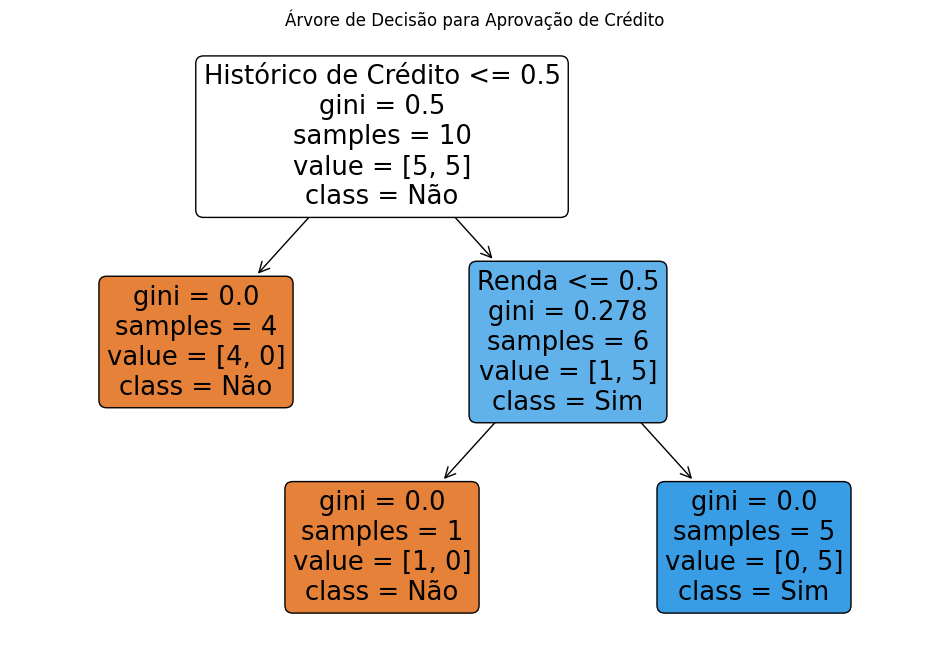

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Criando o DataFrame
data = {
    'Renda': ['Baixa', 'Média', 'Alta', 'Alta', 'Média', 'Alta', 'Média', 'Baixa', 'Baixa', 'Média'],
    'Histórico de Crédito': ['Ruim', 'Bom', 'Bom', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim', 'Bom'],
    'Emprego': ['Instável', 'Estável', 'Estável', 'Instável', 'Instável', 'Estável', 'Estável', 'Instável', 'Estável', 'Instável'],
    'Aprovado': ['Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim']
}

df = pd.DataFrame(data)

# Convertendo variáveis categóricas em numéricas
df['Renda'] = df['Renda'].map({'Baixa': 0, 'Média': 1, 'Alta': 2})
df['Histórico de Crédito'] = df['Histórico de Crédito'].map({'Ruim': 0, 'Bom': 1})
df['Emprego'] = df['Emprego'].map({'Instável': 0, 'Estável': 1})
df['Aprovado'] = df['Aprovado'].map({'Não': 0, 'Sim': 1})

# Separando características e alvo
X = df[['Renda', 'Histórico de Crédito', 'Emprego']]
y = df['Aprovado']

# Criando o classificador
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y)

# Plotando a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Renda', 'Histórico de Crédito', 'Emprego'], class_names=['Não', 'Sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão para Aprovação de Crédito")
plt.show()
